# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and check values of 2 playlist sets

In [2]:
#set keyword
KEYWORD1='rock'

In [3]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head()

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWXRqgorJj26U,Rock Classics,173,spotify,Spotify,9810263
1,37i9dQZF1DX1rVvRgjX59F,90s Rock Anthems,100,spotify,Spotify,4555610
2,37i9dQZF1DX1spT6G94GFC,80s Rock Anthems,80,spotify,Spotify,2143197
3,37i9dQZF1DX2sUQwD7tbmL,Feel-Good Indie Rock,120,spotify,Spotify,1523552
4,37i9dQZF1EQpj7X7UK8OOF,Rock Mix,50,spotify,Spotify,1462897


In [4]:
playlist1_df.shape

(97, 6)

In [5]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_playlist_tracks_data.csv')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,0,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.162,0.112,0.32900,0.163,0.756,109.975,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.577550,rock
1,1,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.162,0.112,0.32900,0.163,0.756,109.975,37i9dQZF1DX1spT6G94GFC,80s Rock Anthems,3.577550,rock
2,2,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.162,0.112,0.32900,0.163,0.756,109.975,3Ho3iO0iJykgEQNbjB2sic,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3.577550,rock
3,3,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.162,0.112,0.32900,0.163,0.756,109.975,37i9dQZF1DX4vth7idTQch,Rockhymnen,3.577550,rock
4,4,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,711MCceyCBcFnzjGY4Q7Un,AC/DC,10v912xgTZbjAtYfyKWJCS,208400,1979-07-27,84,0.574,...,0.133,0.061,0.00158,0.156,0.423,115.728,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.473333,rock


In [6]:
tracks1_df.shape

(2131, 24)

In [7]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

1877

<AxesSubplot:>

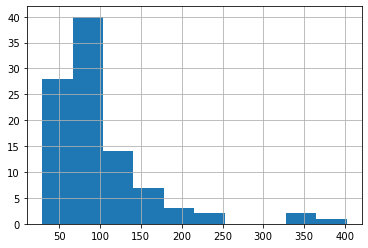

In [8]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [9]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

97

<AxesSubplot:>

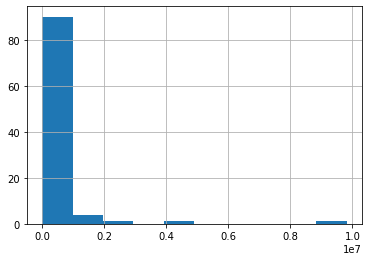

In [10]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [11]:
###################### set keyword
KEYWORD2='R&B'

In [12]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3759509
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2762610
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2188378
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,1175872
4,37i9dQZF1EQoqCH7BwIYb7,R&B Mix,50,spotify,Spotify,883491
5,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,50,spotify,Spotify,714627
6,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,70,spotify,Spotify,708436
7,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,50,spotify,Spotify,430512
8,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,75,spotify,Spotify,344688
9,37i9dQZF1DXch2nNxu927l,Suprême R&B,60,spotify,Spotify,301244


In [13]:
playlist2_df.shape

(68, 6)

In [14]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_tracks_data.csv')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,0,2c7huQpWR29bcXrrvLcG2j,We Need A Resolution (feat. Timbaland),0urTpYCsixqZwgNTkPJOJ4,Aaliyah,0cNaDPtbHC1PMJMRTY2GFc,242826,2001-07-07,64,0.728,...,0.2900,0.300,0.000000,0.113,0.824,147.170,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.047100,R&B
1,1,0ceeRNqbOzRiGE42KWSrRa,Into You (feat. Fabolous),0le01dl1WllSHhjEXRl4in,Tamia,43QuYbSfbTjcsghwJyUnyP,294093,2004-04-05,61,0.677,...,0.0327,0.219,0.000000,0.173,0.570,91.104,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.901550,R&B
2,2,4iuNZTcvT9diFySSzVsnVS,When I See U,7xAcVHPiirnUqfdqo0USb1,Fantasia,42DybH3gl3WcfXAQySOEiX,217346,2006-12-09,71,0.569,...,0.1720,0.452,0.000079,0.205,0.754,93.135,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.622433,R&B
3,3,4iuNZTcvT9diFySSzVsnVS,When I See U,7xAcVHPiirnUqfdqo0USb1,Fantasia,42DybH3gl3WcfXAQySOEiX,217346,2006-12-09,71,0.569,...,0.1720,0.452,0.000079,0.205,0.754,93.135,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,3.622433,R&B
4,4,2RqZFOLOnzVmHUX7ZMcaES,Let It Go,1vfezMIyCr4XUdYRaKIKi3,Keyshia Cole,7mdy09EO4q6F9VWBtXDDjK,238333,2007-01-01,67,0.806,...,0.2150,0.197,0.000000,0.209,0.781,94.967,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.972217,R&B


In [15]:
tracks2_df.shape

(1378, 24)

In [16]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1178

## 2. Compare histograms of 2 playlist sets

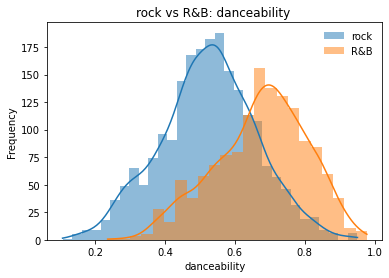

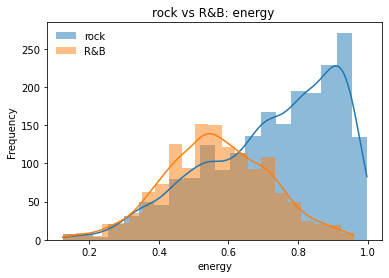

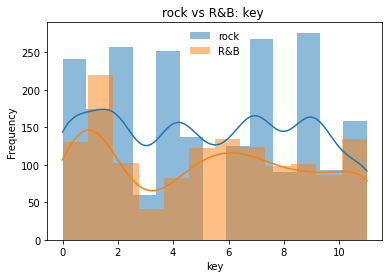

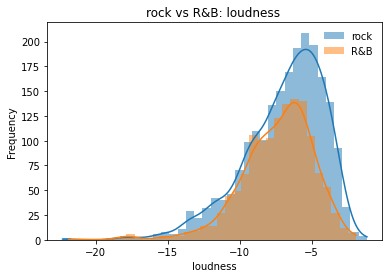

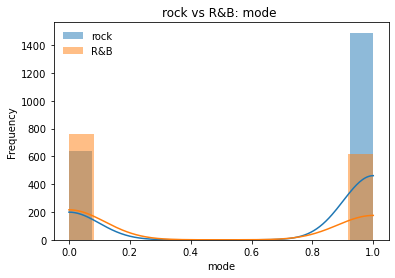

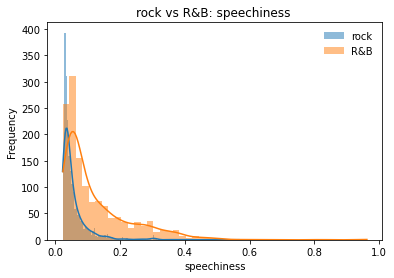

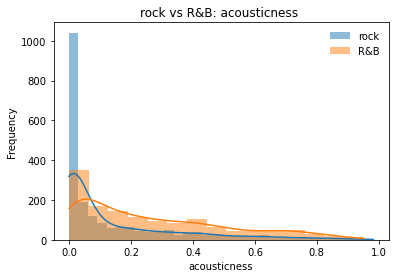

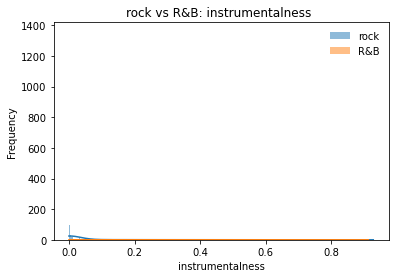

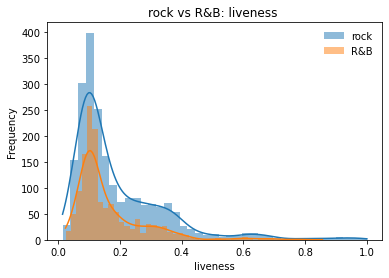

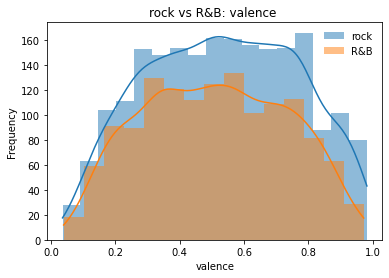

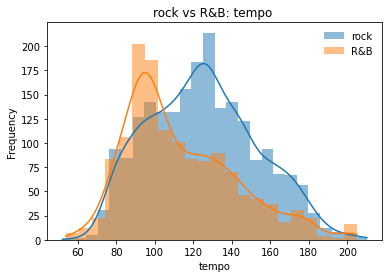

In [17]:
for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig,ax = plt.subplots()
    
    sns.histplot(tracks1_df[col], ax=ax, label= KEYWORD1, kde=True, color='C0', edgecolor='None')
    sns.histplot(tracks2_df[col], ax=ax, label= KEYWORD2,  kde=True, color='C1', edgecolor='None')
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


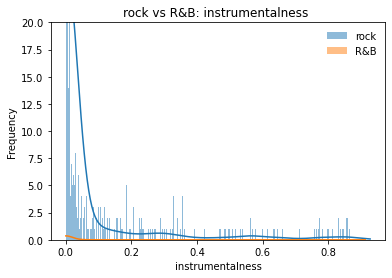

In [20]:
for col in ['instrumentalness']:
    fig,ax = plt.subplots()
    
    sns.histplot(tracks1_df[col], ax=ax, label= KEYWORD1, kde=True, color='C0', edgecolor='None')
    sns.histplot(tracks2_df[col], ax=ax, label= KEYWORD2,  kde=True, color='C1', edgecolor='None')
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.ylim([0,20])
    plt.show()

>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #RobustScaler would also work

In [22]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df])
tracks1_df.shape, tracks2_df.shape, tracks_df.shape

((2131, 24), (1378, 24), (3509, 24))

In [23]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(3055, 24)

In [24]:
#Normalize loudness
tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    3055.000000
mean        0.720959
std         0.128592
min         0.000000
25%         0.645696
50%         0.742355
75%         0.813135
max         1.000000
Name: loudness, dtype: float64

In [25]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()

count    3055.000000
mean        0.435147
std         0.184112
min         0.000000
25%         0.284330
50%         0.429366
75%         0.556719
max         1.000000
Name: tempo, dtype: float64

In [27]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2})

In [28]:
tracks_df

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,genre_id
0,0,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.11200,0.32900,0.1630,0.756,0.366482,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.577550,rock,1
4,4,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,711MCceyCBcFnzjGY4Q7Un,AC/DC,10v912xgTZbjAtYfyKWJCS,208400,1979-07-27,84,0.574,...,0.06100,0.00158,0.1560,0.423,0.402859,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.473333,rock,1
8,8,3YBZIN3rekqsKxbJc9FZko,Paradise City,3qm84nBOXUEQ2vnTfUTTFC,Guns N' Roses,3I9Z1nDCL4E0cP62flcbI5,405640,1987-07-21,79,0.273,...,0.01690,0.01110,0.1420,0.472,0.305121,37i9dQZF1DWXRqgorJj26U,Rock Classics,6.760667,rock,1
12,12,39shmbIHICJ2Wxnk1fPSdz,Should I Stay or Should I Go - Remastered,3RGLhK1IP9jnYFH4BRFJBS,The Clash,1ZH5g1RDq3GY1OvyD0w0s2,188986,1982,79,0.743,...,0.08040,0.00000,0.3840,0.820,0.387981,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.149767,rock,1
16,16,2Cdvbe2G4hZsnhNMKyGrie,I Love Rock 'N Roll,1Fmb52lZ6Jv7FMWXXTPO3K,Joan Jett & The Blackhearts,555qwe1qUgLdee80TZ2CQt,175173,1981-11-18,77,0.535,...,0.32600,0.00000,0.6590,0.901,0.267865,37i9dQZF1DWXRqgorJj26U,Rock Classics,2.919550,rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1373,6Ius4TC0L3cN74HT7ENE6e,Wet Dreamz,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,7viNUmZZ8ztn2UB4XB3jIL,239320,2014-12-09,81,0.517,...,0.07510,0.00000,0.1280,0.584,0.783379,37i9dQZF1DX3ORvAIr1RbU,Hip Hop + R&B FM,3.988667,R&B,2
1374,1374,0bVErWwMwsPgf3PufQA80g,Been Waiting,6rHWAH6F4mr2AViSxMV673,Jessica Mauboy,21Z3oePgswl4kS1LW0aXVm,227746,2009-08-24,45,0.684,...,0.16700,0.00000,0.0645,0.821,0.392179,37i9dQZF1DX3ORvAIr1RbU,Hip Hop + R&B FM,3.795767,R&B,2
1375,1375,0P6AWOA4LG1XOctzaVu5tt,The Weekend - Funk Wav Remix,7tYKF4w9nC0nq9CsPZTHyP,SZA,5enEsi887wD3qGoMCK4jLr,171805,2017-12-15,75,0.775,...,0.49500,0.00000,0.1260,0.667,0.315580,37i9dQZF1DX3ORvAIr1RbU,Hip Hop + R&B FM,2.863417,R&B,2
1376,1376,7gVwgc8b3XnO87TpmXXFA5,Diva (feat. Lil Tecca),2tIP7SsRs7vjIcLrU85W8J,The Kid LAROI,6baGSG5U130x5ttGIIRIwR,172004,2020-01-31,74,0.686,...,0.00728,0.00000,0.0946,0.457,0.587333,37i9dQZF1DX3ORvAIr1RbU,Hip Hop + R&B FM,2.866733,R&B,2


## 4. Preview possible classification results

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


<AxesSubplot:xlabel='energy', ylabel='tempo'>

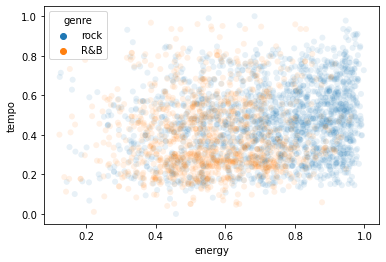

In [31]:
sns.scatterplot(data=tracks_df, x='energy', y='tempo', hue='genre', alpha=0.1)

<AxesSubplot:xlabel='energy', ylabel='tempo'>

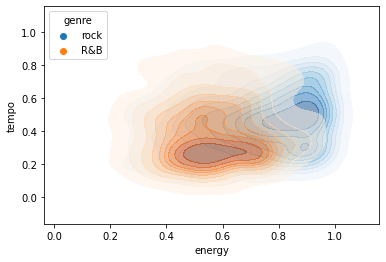

In [32]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Blues','Oranges']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(x=df['energy'],y=df['tempo'], ax=ax,\
                shade=True, alpha=0.5, cmap=colormaps[n])

#hack for proper legend render
sns.scatterplot(data=tracks_df, x='energy', y='tempo', hue='genre', s=0)

> Q: How would you interpret the resulting scatterplot/distribution?

In [35]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve


## 5. Model Tuning: kNN

Select audio features to use for the model

In [33]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

3055 3055


Perform KNN using K= [2..50] and validate using k-fold = 5

In [36]:
#check indices used in folds
KFOLDS=5
kf = KFold(n_splits=KFOLDS)
for i,(train, test) in enumerate(kf.split(X)):
    #generate indices to use for the k-fold splits
    full_range = np.arange(len(X)).tolist()
    gap = [x for x in full_range if x not in train]
    if (i>0)&(i<KFOLDS-1):
        print("K=%d, train idx: %d-%d, %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), min(gap), max(gap), max(train),len(train),\
                                                                     min(test), max(test), len(test)))
    else:
         print("K=%d, train idx: %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), max(train),len(train),\
                                                                     min(test), max(test), len(test)))

K=0, train idx: 611-3054 (n=2444), test idx:  0-610 (n=611)
K=1, train idx: 0-611, 1221-3054 (n=2444), test idx:  611-1221 (n=611)
K=2, train idx: 0-1222, 1832-3054 (n=2444), test idx:  1222-1832 (n=611)
K=3, train idx: 0-1833, 2443-3054 (n=2444), test idx:  1833-2443 (n=611)
K=4, train idx: 0-2443 (n=2444), test idx:  2444-3054 (n=611)


In [37]:
KFold?

In [38]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...DONE!
Fitting KNN with K=4 ...DONE!
Fitting KNN with K=5 ...DONE!
Fitting KNN with K=6 ...DONE!
Fitting KNN with K=7 ...DONE!
Fitting KNN with K=8 ...DONE!
Fitting KNN with K=9 ...DONE!
Fitting KNN with K=10 ...DONE!
Fitting KNN with K=11 ...DONE!
Fitting KNN with K=12 ...DONE!
Fitting KNN with K=13 ...DONE!
Fitting KNN with K=14 ...DONE!
Fitting KNN with K=15 ...DONE!
Fitting KNN with K=16 ...DONE!
Fitting KNN with K=17 ...DONE!
Fitting KNN with K=18 ...DONE!
Fitting KNN with K=19 ...DONE!
Fitting KNN with K=20 ...DONE!
Fitting KNN with K=21 ...DONE!
Fitting KNN with K=22 ...DONE!
Fitting KNN with K=23 ...DONE!
Fitting KNN with K=24 ...DONE!
Fitting KNN with K=25 ...DONE!
Fitting KNN with K=26 ...DONE!
Fitting KNN with K=27 ...DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...DONE!
Fitting KNN with

Choose optimal value of K

The optimal number of neighbors is 16.00 with accuracy 0.6992


Text(0, 0.5, 'Accuracy standard deviation')

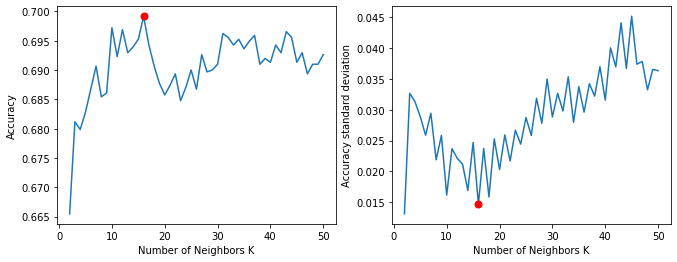

In [39]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.4f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")


Try out optimal model with entire length of the dataset

In [40]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K)
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)
#use model to predict y
knn_ypred = knn_optimal_model.predict(X)

In [42]:
len(knn_ypred)

3055

Create a classification report

In [43]:
# evaluate accuracy
acc = accuracy_score(y, knn_ypred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 16 is 73.158756%


## 6. Model Tuning: SVM

In [44]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model, show_points=True):
    fig,ax=plt.subplots()
    
    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    if show_points:
        ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

In [45]:
# create feature matrix (X)
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit a **linear** kernel

In [46]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")


In [47]:
#Linear model
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS)
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 69.689034% (vs. overall mean score: 69.603928 )
Std of best model score across folds is 0.029485 (vs. overall mean std: 0.028878 )
The accuracy of the SVM classifier for the full dataset is 70.081833%
DONE!


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


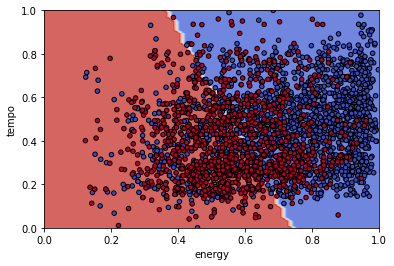

In [48]:
#plot bounds
#error: plot vector bounds only works w 2 input features
plot_vector_bounds(X,svm_model1)

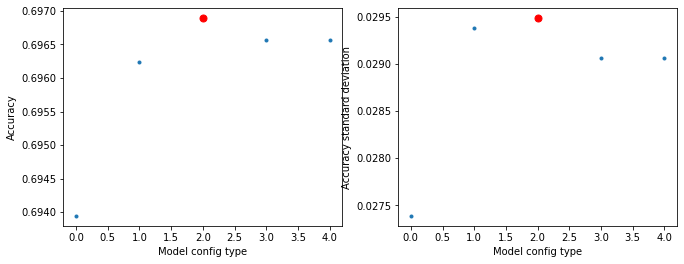

In [49]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **polynomial** kernel

In [50]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': np.arange(2,6),
              'kernel': ['poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best model is SVC(C=100, degree=5, gamma=1, kernel='poly')
Best model config score is 70.016367% (vs. overall mean score: 63.627823 )
Std of best model score across folds is 0.036131 (vs. overall mean std: 0.008787 )
The accuracy of the SVM classifier for the full dataset is 70.409165%
DONE!


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


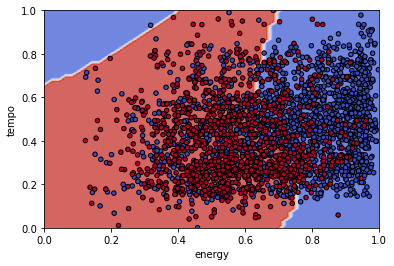

In [52]:
#plot bounds
#error: plot vector bounds only works w 2 input features
plot_vector_bounds(X,svm_model2,show_points=True)

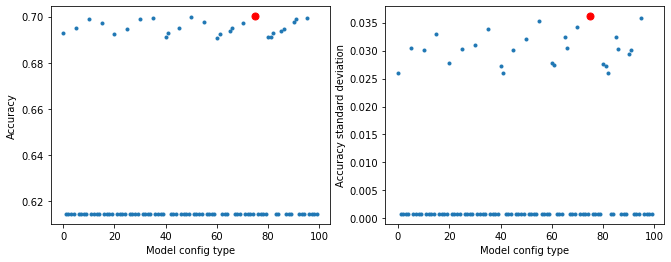

In [53]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **radial** kernel

In [54]:
# defining parameter range
print('Fitting SVM with an rbf kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with an rbf kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=1000, gamma=0.01)
Best model config score is 69.819967% (vs. overall mean score: 66.335843 )
Std of best model score across folds is 0.026524 (vs. overall mean std: 0.017505 )
The accuracy of the SVM classifier for the full dataset is 69.852700%
DONE!


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


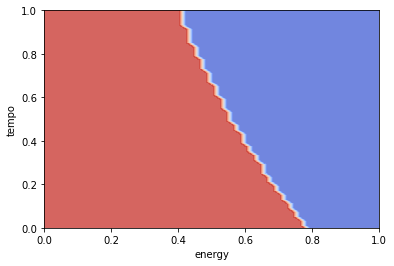

In [55]:
#plot bounds
plot_vector_bounds(X,svm_model3,show_points=False)

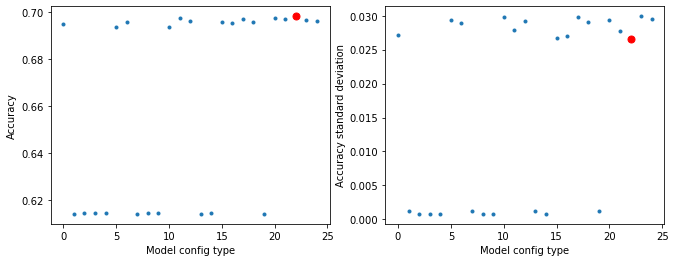

In [56]:
plot_scores(cv_scores_mean,cv_scores_std)

Select best SVM model

In [57]:
svm_optimal_model = svm_model2
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)
#use model to predict y
svm_ypred = svm_optimal_model.predict(X)

In [58]:
# evaluate accuracy
acc = accuracy_score(y, svm_ypred) * 100
print('\nThe accuracy of the SVM classifier for the full dataset is %f%%' %  acc)


The accuracy of the SVM classifier for the full dataset is 70.409165%


## 7. Model Selection

>Q: Which between KNN and SVM performed better? 

In [62]:
genre_lookup={KEYWORD1:1,KEYWORD2:2}
genre_lookup

{'rock': 1, 'R&B': 2}

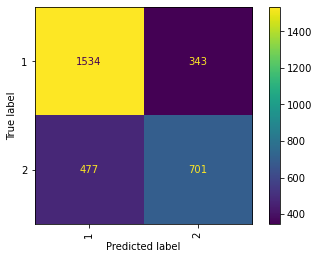

In [63]:
cm = confusion_matrix(y, knn_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

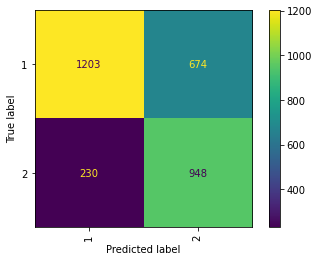

In [64]:
cm = confusion_matrix(y, svm_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

In [65]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_ypred))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_ypred))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           1       0.76      0.82      0.79      1877
           2       0.67      0.60      0.63      1178

    accuracy                           0.73      3055
   macro avg       0.72      0.71      0.71      3055
weighted avg       0.73      0.73      0.73      3055

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

           1       0.84      0.64      0.73      1877
           2       0.58      0.80      0.68      1178

    accuracy                           0.70      3055
   macro avg       0.71      0.72      0.70      3055
weighted avg       0.74      0.70      0.71      3055



- accuracy = % correct genre classifications
        all correct / all
- precision =  % correct genre classifications given everything model classified as that genre, emphasizes false positives
        TP/TP+FP 
- recall = % correct genre classifications given all actual tracks in the genre, emphasizes false negatives
        TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


In [66]:
#helper function
def plot_ROC(model,X,y):
    fig, ax = plt.subplots(figsize=(4,4))
    plot_roc_curve(model,X,y, ax=ax)
    #y=x line
    ax.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #edit verbose legend
    default_legend = ax.get_legend_handles_labels()[1][0]
    ax.legend(labels=[default_legend.split(' (')[-1][:-1]],loc='lower right')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


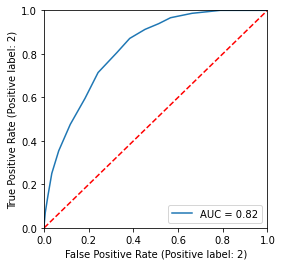

In [67]:
plot_ROC(knn_optimal_model,X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


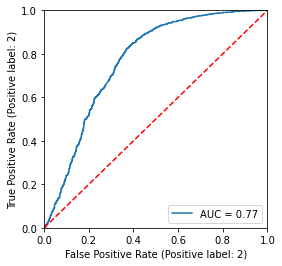

In [68]:
plot_ROC(svm_optimal_model,X,y)

Choose optimal model among those above

In [69]:
optimal_model = knn_optimal_model

## 8. Verifying results using in-sample and out-of-sample predictions

**In-sample**

Check if predicted genres match the genre orinally tagged acc to the spotify playlist name. Focus on misclassified tracks with higher prediction probability to identify possible model improvements

In [70]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
tracks_df['predicted_genre'] = tracks_df['predicted_genre_id'].map({1:KEYWORD1,2:KEYWORD2})
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,valence,tempo,playlist_id,playlist_name,duration_mins,genre,genre_id,predicted_genre_id,predicted_genre,predicted_genre_prob
0,0,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6wPXUmYJ9mOWrKlLzZ5cCa,214653,1980-06-27,74,0.933,...,0.756,0.366482,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.577550,rock,1,1,rock,0.5625
4,4,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,711MCceyCBcFnzjGY4Q7Un,AC/DC,10v912xgTZbjAtYfyKWJCS,208400,1979-07-27,84,0.574,...,0.423,0.402859,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.473333,rock,1,1,rock,0.9375
8,8,3YBZIN3rekqsKxbJc9FZko,Paradise City,3qm84nBOXUEQ2vnTfUTTFC,Guns N' Roses,3I9Z1nDCL4E0cP62flcbI5,405640,1987-07-21,79,0.273,...,0.472,0.305121,37i9dQZF1DWXRqgorJj26U,Rock Classics,6.760667,rock,1,1,rock,1.0000
12,12,39shmbIHICJ2Wxnk1fPSdz,Should I Stay or Should I Go - Remastered,3RGLhK1IP9jnYFH4BRFJBS,The Clash,1ZH5g1RDq3GY1OvyD0w0s2,188986,1982,79,0.743,...,0.820,0.387981,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.149767,rock,1,1,rock,0.8750
16,16,2Cdvbe2G4hZsnhNMKyGrie,I Love Rock 'N Roll,1Fmb52lZ6Jv7FMWXXTPO3K,Joan Jett & The Blackhearts,555qwe1qUgLdee80TZ2CQt,175173,1981-11-18,77,0.535,...,0.901,0.267865,37i9dQZF1DWXRqgorJj26U,Rock Classics,2.919550,rock,1,1,rock,0.5000


<AxesSubplot:>

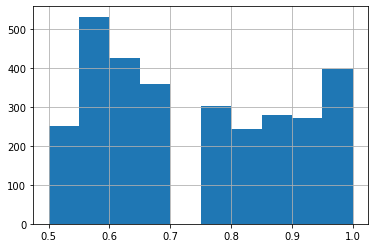

In [71]:
#View histogram of probabilities
tracks_df['predicted_genre_prob'].hist()

Check tracks mistakenly classified with but high probability

In [72]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]\
        .sort_values('predicted_genre_prob', ascending=False)[['track_name','artist_name','genre','predicted_genre','predicted_genre_prob']]

,track_name,artist_name,genre,predicted_genre,predicted_genre_prob
13,You,Lloyd,R&B,rock,0.9375
33,He Wasn't Man Enough,Toni Braxton,R&B,rock,0.9375
46,He Can't Love U,Jagged Edge,R&B,rock,0.9375
114,Freak Like Me,Adina Howard,R&B,rock,0.9375
463,Wake U Up,JOE CHO,R&B,rock,0.9375
653,When You Look At Me - Radio Edit,Christina Milian,R&B,rock,0.9375
677,Last Night,Keyshia Cole,R&B,rock,0.9375
753,Running Back (feat. Flo Rida),Jessica Mauboy,R&B,rock,0.9375
756,The Way I Are,Timbaland,R&B,rock,0.9375
767,Live Your Life - feat. Rihanna,T.I.,R&B,rock,0.9375


**Out-of-sample**

Check if best model correctly predicts the genre of a track in the Top 200 charts (assuming most are not in the playlist data). User may validate the results subjectively as a listener, or refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

In [73]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df = chart_tracks_df.dropna()
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,72,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,82,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,82,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,68,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [74]:
#scale loudness and tempo
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])

In [75]:
#Create columns matching the predicted genre and probability of the best model to each of the tracks in the charts
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].map({1:KEYWORD1,2:KEYWORD2})
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWa

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,72,0.578,0.574,...,1.0,0.0454,0.196,0.00000,0.0830,0.301,0.751215,1,rock,0.6875
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,82,0.358,0.557,...,1.0,0.0590,0.695,0.00000,0.0902,0.494,0.209691,2,R&B,0.8125
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,82,0.748,0.524,...,1.0,0.0338,0.414,0.00000,0.1110,0.661,0.270261,2,R&B,0.8125
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,68,0.662,0.586,...,1.0,0.0307,0.097,0.00272,0.1150,0.296,0.239815,2,R&B,0.8750
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,...,1.0,0.0800,0.338,0.00000,0.0975,0.447,0.300878,2,R&B,0.7500


In [76]:
chart_tracks_df['predicted_genre'].value_counts()

rock    2524
R&B     1725
Name: predicted_genre, dtype: int64

<AxesSubplot:>

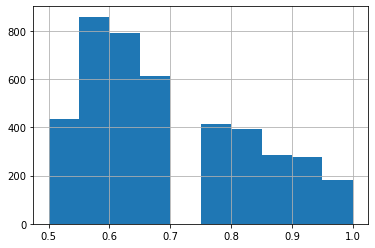

In [77]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

> Q: Can you identify tracks that were misclassfied by the model?
    Does it make sense that the model misclassfied the tracks given the model configuration? Why or why not?

In [78]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rock'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
264,Alone,Marshmello,rock,1.0
306,I Wanna Be With You,Mandy Moore,rock,1.0
666,Bleed It Out,Linkin Park,rock,1.0
2759,Candy,BAEKHYUN,rock,1.0
2751,Punch,NCT 127,rock,1.0
1503,Nice For What,Drake,rock,1.0
660,Somewhere I Belong,Linkin Park,rock,1.0
658,Battle Symphony,Linkin Park,rock,1.0
2735,Can't You See Me?,TOMORROW X TOGETHER,rock,1.0
300,Not Today,BTS,rock,1.0


In [79]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='R&B'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
796,Stargazing,Kygo,R&B,1.0000
3117,HANDLE IT,TWICE,R&B,1.0000
44,All Time Low,Jon Bellion,R&B,1.0000
3241,I Need You Christmas,Jonas Brothers,R&B,1.0000
2596,Young & Alive,Bazzi,R&B,1.0000
1448,Mob Ties,Drake,R&B,1.0000
3099,HANDLE IT,TWICE,R&B,1.0000
110,So Sick,Ne-Yo,R&B,0.9375
4068,Best Friends,The Weeknd,R&B,0.9375
4034,Family Is Forever,ABS-CBN Music All Star,R&B,0.9375


**References**

1. Cross validation walkthrough [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)
2. Plotting ROC curves [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)